In [1]:
from src.dataprep.loader import load_txt_data
from src.dataprep.preprocess import preprocess_data, balance_data
from src.features.extractor import extract_features

import pandas as pd

# Load & Preprocess Data

In [2]:
clickbait_df = load_txt_data('./dataset/clickbait_data.txt')
clickbait_df = preprocess_data(clickbait_df, '1')

In [3]:
clickbait_df

,headline,label
0,Should I Get Bings,1
1,Which TV Female Friend Group Do You Belong In,1
2,"The New ""Star Wars: The Force Awakens"" Trailer...",1
3,"This Vine Of New York On ""Celebrity Big Brothe...",1
4,A Couple Did A Stunning Photo Shoot With Their...,1
...,...,...
15995,"There Was A Mini ""Sisterhood Of The Traveling ...",1
15996,21 Dogs Who Are Thankful For Their Best Friends,1
15997,People Are Proving No Dick Is Too Big By Dropp...,1
15998,"I'm An Atheist, But I'm Not",1


In [4]:
nonclickbait_df = load_txt_data('./dataset/non_clickbait_data.txt')
nonclickbait_df = preprocess_data(nonclickbait_df, '-1')

In [5]:
nonclickbait_df

,headline,label
0,Bill Changing Credit Card Rules Is Sent to Oba...,-1
1,Yankees Pitchers Trade Fielding Drills for Put...,-1
2,Coldplay's new album hits stores worldwide thi...,-1
3,U.N. Leader Presses Sri Lanka on Speeding Reli...,-1
4,White House Announces International Meetings t...,-1
...,...,...
9996,Pentagon unable to explain 'mystery missile' v...,-1
9997,Blair: G8 leaders announce $50 billion aid inc...,-1
9998,"To Make Female Hearts Flutter in Iraq, Throw a...",-1
9999,Drone smartphone app to help heart attack vict...,-1


# Balance Data

In [6]:
clickbait_df, nonclickbait_df = balance_data(clickbait_df, nonclickbait_df, 10000)

In [7]:
clickbait_df.shape[0]

10000

In [8]:
nonclickbait_df.shape[0]

10000

In [9]:
df = pd.concat([clickbait_df, nonclickbait_df], ignore_index=True)

In [10]:
df

,headline,label
0,24 Guys Who Totally Rocked The Man Bun In 2015,1
1,Can You Identify The Disney Character By Just ...,1
2,7 Easy Dinners That Are Tasty AF,1
3,21 Things That Mildly Thrill Everyone Who Work...,1
4,We Tried On The Most Perverted Men's Halloween...,1
...,...,...
19995,Getting Specific in Order to Get Confirmed\nAm...,-1
19996,"FedEx Earnings Fall, but Market Share Gains\n2...",-1
19997,Iran will continue work on nuclear fuel cycle,-1
19998,"For UConn, Trouble Ahead and Behind\nAlbania S...",-1


# Features Extraction

In [11]:
df_features = extract_features(df)

In [12]:
df_features.to_csv('dataset/df_features.csv', index=False)

In [13]:
df_features

,headline,class,#words,word length,stopword%,has number,has determiner,has pronoun,has comparative,has superlative,has sup or comp,sentiment value
0,24 guys who totally rocked the man bun in 2015,1,10,3.7,0.3,1,1,1,0,0,0,1
1,can you identify the disney character by just ...,1,10,4.8,0.6,0,1,1,0,0,0,3
2,7 easy dinners that are tasty af,1,7,3.714286,0.285714,1,0,1,0,0,0,3
3,21 things that mildly thrill everyone who work...,1,10,4.8,0.4,1,0,1,0,0,0,3
4,we tried on the most perverted men's halloween...,1,10,4.7,0.5,0,1,1,0,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
19995,getting specific in order to get confirmed\nam...,-1,27,4.814815,0.296296,0,1,0,0,0,0,1
19996,"fedex earnings fall, but market share gains\n2...",-1,18,4.777778,0.055556,1,0,0,0,0,0,1
19997,iran will continue work on nuclear fuel cycle,-1,8,4.75,0.25,0,0,0,0,0,0,3
19998,"for uconn, trouble ahead and behind\nalbania s...",-1,23,4.304348,0.217391,0,0,0,0,0,0,1


# XGB Feature Importance

In [26]:
import pandas as pd
import xgboost as xgb
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt

In [27]:
df_features = pd.read_csv("dataset/df_features.csv")

In [28]:
col = 'class'
conditions = [df_features[col] == 1, df_features[col] == -1]
choices = ["1", "0"]  # changing labels to 1 and 0 since that is required

df_features['class'] = np.select(conditions, choices, default=np.nan)
df_features['class'] = pd.to_numeric(df_features['class'])

In [29]:
df_features

,headline,class,#words,word length,stopword%,has number,has determiner,has pronoun,has comparative,has superlative,has sup or comp,sentiment value
0,24 guys who totally rocked the man bun in 2015,1,10,3.700000,0.300000,1,1,1,0,0,0,1
1,can you identify the disney character by just ...,1,10,4.800000,0.600000,0,1,1,0,0,0,3
2,7 easy dinners that are tasty af,1,7,3.714286,0.285714,1,0,1,0,0,0,3
3,21 things that mildly thrill everyone who work...,1,10,4.800000,0.400000,1,0,1,0,0,0,3
4,we tried on the most perverted men's halloween...,1,10,4.700000,0.500000,0,1,1,0,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
19995,getting specific in order to get confirmed\nam...,0,27,4.814815,0.296296,0,1,0,0,0,0,1
19996,"fedex earnings fall, but market share gains\n2...",0,18,4.777778,0.055556,1,0,0,0,0,0,1
19997,iran will continue work on nuclear fuel cycle,0,8,4.750000,0.250000,0,0,0,0,0,0,3
19998,"for uconn, trouble ahead and behind\nalbania s...",0,23,4.304348,0.217391,0,0,0,0,0,0,1


### Feature importance generation

In [41]:
label = df_features[['class']]
features = df_features.iloc[:, 2:]

data_matrix = xgb.DMatrix(features, label)

params = {'objective':'binary:logistic'} #params need to be explicity stated, binary:logistic chosen since that is default in API settings
trained = xgb.train(params, data_matrix)

feature_importance = trained.get_score(importance_type='weight')

In [42]:
feature_importance

{'#words': 147.0,
 'word length': 129.0,
 'stopword%': 88.0,
 'has number': 39.0,
 'has determiner': 31.0,
 'has pronoun': 22.0,
 'has comparative': 1.0,
 'has superlative': 12.0,
 'has sup or comp': 2.0,
 'sentiment value': 38.0}

In [43]:
k = Counter(feature_importance)
feature_importance_table = pd.DataFrame.from_dict(k, orient='index').reset_index()
feature_importance_table.columns = ['Features', 'Weights']

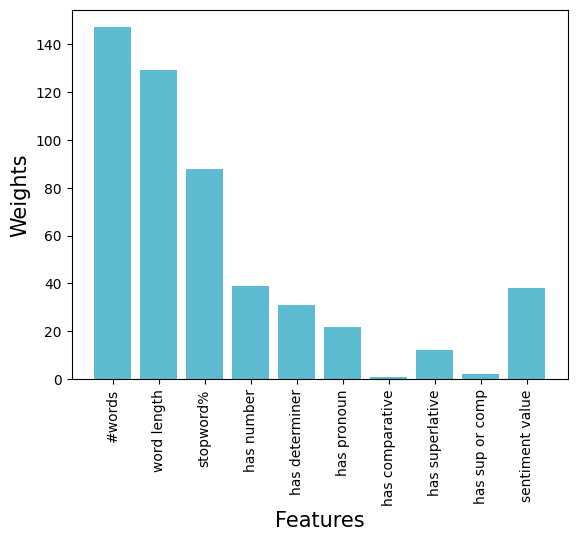

In [44]:
#plot the feature importance
fts = feature_importance_table['Features']
weights = feature_importance_table['Weights']
y_pos = np.arange(len(weights))

plt.bar(y_pos, weights, color="#5dbcd2")
plt.xticks(y_pos, fts, rotation = 90)
plt.xlabel("Features", fontsize=15)
plt.ylabel("Weights", fontsize=15)
plt.savefig("featureimp.png", bbox_inches='tight')
plt.show()

# Model Training: XGB, SVM, Random Forrest

In [46]:
import pandas as pd
import numpy as np
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [47]:
loaded_data = pd.read_csv("dataset/df_features.csv")

col = 'class'
conditions = [loaded_data[col] == 1, loaded_data[col] == -1]
choices = ["1", "0"] #changing labels to 1 and 0 since that is required

loaded_data['class'] = np.select(conditions, choices, default=np.nan)
loaded_data['class'] = pd.to_numeric(loaded_data['class'])

label = loaded_data[['class']]
features = loaded_data.iloc[:, 2:]
features = features.drop(['has superlative', 'has comparative','has sup or comp'], axis =1)

In [48]:
#convert to array
label_arr = np.ravel(label)
features_arr = np.array(features)

In [49]:
#scoring to get accuracy, precision, recall, f1-score
scoring_tech = {'accuracy' : make_scorer(accuracy_score),
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score),
           'f1_score' : make_scorer(f1_score)}

In [50]:
## XGBoost
xgb_clf = xgb.XGBClassifier()
score_xgb = cross_validate(xgb_clf, features_arr, label_arr, cv=10, scoring=scoring_tech)
xgb_results = pd.DataFrame.from_dict(score_xgb)
y_pred_xgb = cross_val_predict(xgb_clf, features_arr, label_arr, cv=10)

In [51]:
## Suport Vector Classifier
svm_clf = SVC(gamma='auto') #all default parameters, gamma has to be explicitly stated
score_svm = cross_validate(svm_clf, features_arr, label_arr, cv=10, scoring=scoring_tech)
svm_results = pd.DataFrame.from_dict(score_svm)
y_pred_svm = cross_val_predict(svm_clf, features_arr, label_arr, cv=10)

In [52]:
## Random Forest
rf_clf = RandomForestClassifier(n_estimators=100) #default value
score_rf = cross_validate(rf_clf, features_arr, label_arr, cv=10, scoring=scoring_tech)
rf_results = pd.DataFrame.from_dict(score_rf)
y_pred_rf = cross_val_predict(rf_clf, features_arr, label_arr, cv=10)

### Confusion Matrix Plot

Text(0.5, 1.0, 'Confusion Matrix for XGBoost')

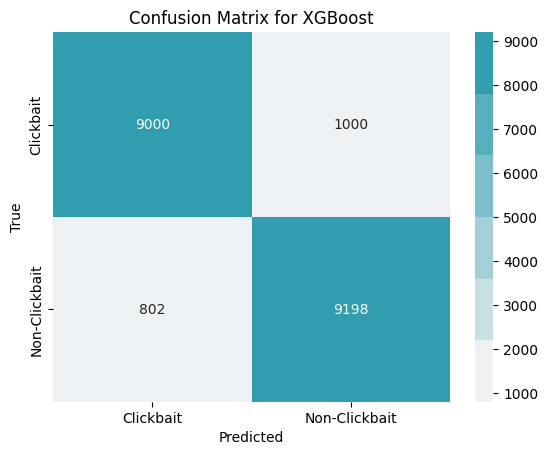

In [53]:
##XGBoost
cmtx_xgb = pd.DataFrame(
    confusion_matrix(label_arr, y_pred_xgb, labels=[1, 0]),
    index=['Clickbait', 'Non-Clickbait'],
    columns=['Clickbait', 'Non-Clickbait']
)
#plot
ax = sns.heatmap(cmtx_xgb, annot=True, fmt='d', cmap=sns.light_palette((210, 90, 60), input="husl"))
ax.set_xlabel("Predicted")
ax.set_ylabel("True")
ax.set_title("Confusion Matrix for XGBoost")

Text(0.5, 1.0, 'Confusion Matrix for SVM')

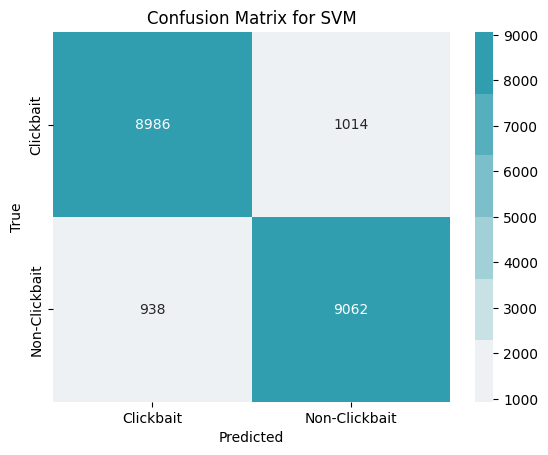

In [54]:
##SVM
cmtx_svm = pd.DataFrame(
    confusion_matrix(label_arr, y_pred_svm, labels=[1, 0]),
    index=['Clickbait', 'Non-Clickbait'],
    columns=['Clickbait', 'Non-Clickbait']
)
#plot
ax = sns.heatmap(cmtx_svm, annot=True, fmt='d', cmap=sns.light_palette((210, 90, 60), input="husl"))
ax.set_xlabel("Predicted")
ax.set_ylabel("True")
ax.set_title("Confusion Matrix for SVM")

Text(0.5, 1.0, 'Confusion Matrix for Random Forest')

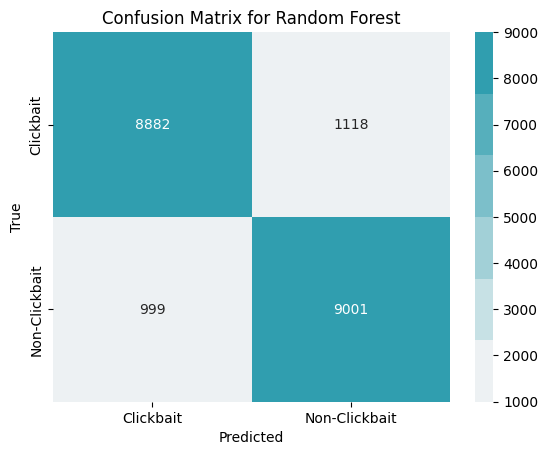

In [55]:
##RBF
cmtx_rf = pd.DataFrame(
    confusion_matrix(label_arr, y_pred_rf, labels=[1, 0]),
    index=['Clickbait', 'Non-Clickbait'],
    columns=['Clickbait', 'Non-Clickbait']
)
#plot
ax = sns.heatmap(cmtx_rf, annot=True, fmt='d', cmap=sns.light_palette((210, 90, 60), input="husl"))
ax.set_xlabel("Predicted")
ax.set_ylabel("True")
ax.set_title("Confusion Matrix for Random Forest")

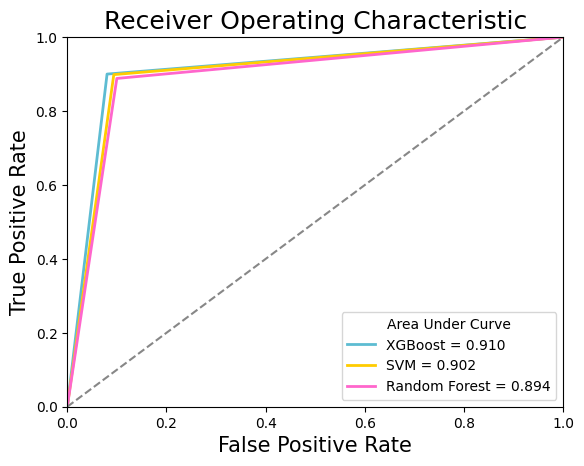

In [56]:
### ROC Curve
auc_xgb = roc_auc_score(label_arr, y_pred_xgb)
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(label_arr, y_pred_xgb)

auc_svm = roc_auc_score(label_arr, y_pred_svm)
fpr_svm, tpr_svm, thresholds_svm = roc_curve(label_arr, y_pred_svm)

auc_rf = roc_auc_score(label_arr, y_pred_rf)
fpr_rf, tpr_rf, thresholds_rf = roc_curve(label_arr, y_pred_rf)

plt.plot(fpr_xgb, tpr_xgb, label='XGBoost = %0.3f' % auc_xgb, color="#5dbcd2", linewidth=2)
plt.plot(fpr_svm, tpr_svm, label='SVM = %0.3f' % auc_svm, color="#ffcc00", linewidth=2)
plt.plot(fpr_rf, tpr_rf, label='Random Forest = %0.3f' % auc_rf, color="#ff66cc", linewidth=2)
plt.plot([0, 1], [0, 1], '--', color="#878787")  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate', fontsize=15)
plt.ylabel('True Positive Rate', fontsize=15)
plt.title('Receiver Operating Characteristic', fontsize=18)
plt.legend(loc="lower right", title="Area Under Curve")